# Goals for notebook


We have data from the past 4 complete seasons of MLB baseball that show the top offensive player's and their respective numbers. We want to analyze how these numbers relate to each other and how they impact the total number of Home Runs and Runs Batted In.

---

1. **Load the data** into a pandas DataFrame

--- 

2. **Clean data** (if necessary)
    - See if there are any missing values

---

3. **Exploratory Data Analysis** (EDA)
    - Make histograms of OPS, AVG
    - See which teams had the most RBI's and HomeRuns

---
4. **Feature Engineering**
    - Make new columns describing any intersting additional statistics (for example show each player's walks to strikeout ratio)
 
---
5. **Get the data ready for a machine learning model**
    - We want to see if we can build a model to predict Home Runs and or RBI's based on other features. 
 
---

6. **Evaluate our model's metrics** and see if we can improve it.

## Load Data

In [1]:
import os

os.listdir()

['.git',
 '.ipynb_checkpoints',
 '2019-2022 MLB Hitting Leaders CSV (UTF-8).csv',
 'MLB Hitting Leaders 2019-2022.ipynb']

In [2]:
import pandas as pd 

df = pd.read_csv(os.listdir()[2])

df.head()

,Year,Player Name,Player Position,Team Name,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
0,2022,Aaron Judge,CF,NYY,157,570,133,177,28,0,62,131,111,175,16,3,0.311,0.425,0.686,1.111
1,2022,Yordan Alvarez,DH,HOU,135,470,95,144,29,2,37,97,78,106,1,1,0.306,0.406,0.613,1.019
2,2022,Paul Goldschmidt,1B,STL,151,561,106,178,41,0,35,115,79,141,7,0,0.317,0.404,0.578,0.982
3,2022,Jose Altuve,2B,HOU,141,527,103,158,39,0,28,57,66,87,18,1,0.300,0.387,0.533,0.920
4,2022,Freddie Freeman,1B,LAD,159,612,117,199,47,2,21,100,84,102,13,3,0.325,0.407,0.511,0.918


## Data Visuals

In [3]:
desc_stats = df.describe()

desc_stats

,Year,G,AB,R,H,2B,3B,HR,RBI,BB,SO,SB,CS,AVG,OBP,SLG,OPS
count,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000,539.000000
mean,2020.476809,121.129870,445.103896,66.933210,118.192950,23.812616,1.964750,19.302412,64.020408,45.777365,101.961039,7.231911,2.293135,0.264171,0.338481,0.456505,0.794985
std,1.111331,40.704413,154.741769,26.713946,44.520534,10.430873,1.964523,11.058118,27.534661,22.935552,42.920870,8.198968,2.386332,0.030388,0.033779,0.070663,0.095562
min,2019.000000,44.000000,154.000000,13.000000,32.000000,3.000000,0.000000,0.000000,10.000000,5.000000,12.000000,0.000000,0.000000,0.176000,0.238000,0.266000,0.552000
25%,2019.500000,60.000000,232.500000,42.500000,68.000000,15.000000,0.000000,11.000000,41.000000,28.000000,64.000000,1.000000,0.000000,0.245000,0.316000,0.409000,0.731000
50%,2020.000000,140.000000,499.000000,71.000000,130.000000,25.000000,2.000000,17.000000,65.000000,45.000000,103.000000,4.000000,2.000000,0.265000,0.338000,0.450000,0.788000
75%,2021.000000,150.500000,555.500000,86.500000,150.000000,31.000000,3.000000,28.000000,85.000000,59.000000,134.000000,10.000000,3.000000,0.283000,0.358000,0.503000,0.850000
max,2022.000000,162.000000,681.000000,135.000000,206.000000,58.000000,10.000000,62.000000,131.000000,145.000000,213.000000,47.000000,12.000000,0.364000,0.490000,0.695000,1.185000


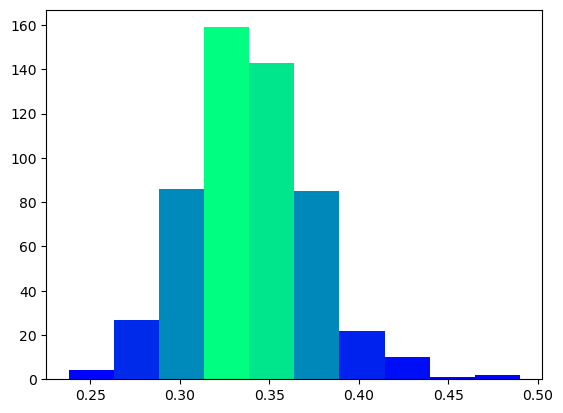

In [38]:
from matplotlib import colors

N, bins, patches = plt.hist(df['OBP'])

fracs = N / N.max()

norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.winter(norm(thisfrac))
    thispatch.set_facecolor(color)

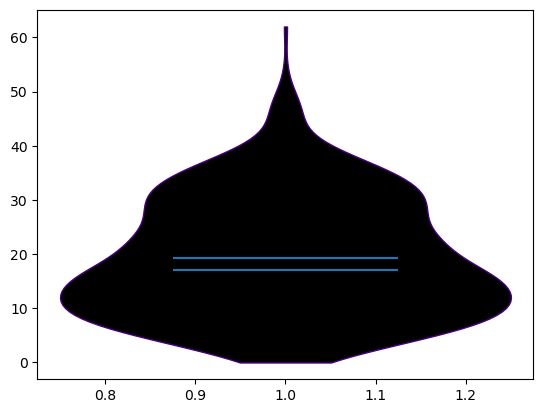

In [28]:
violin = plt.violinplot(df['HR'], showmeans=True, showmedians=True, showextrema=False)

for ii in violin['bodies']:
    ii.set_color('black')
    ii.set_edgecolor('indigo')
    ii.set_alpha(1)

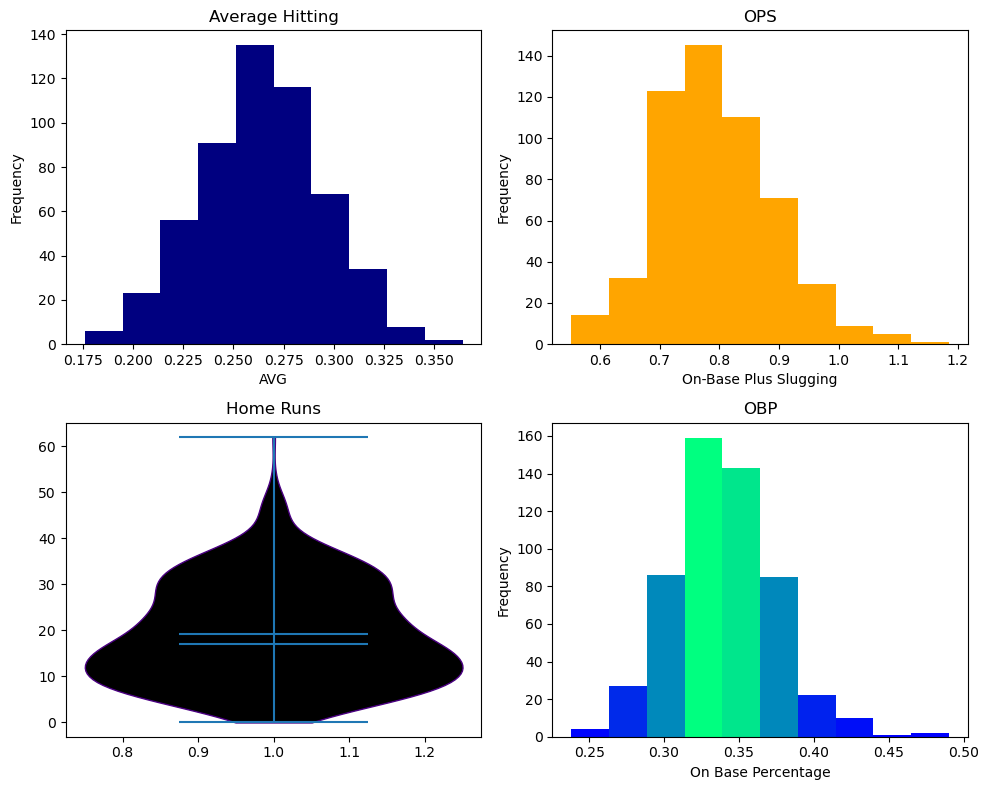

In [50]:
import matplotlib.pyplot as plt 
from matplotlib import colors

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 8), tight_layout=True)

ax1.hist(df['AVG'], color='navy')
ax1.set_ylabel('Frequency')
ax1.set_xlabel('AVG')
ax1.set_title('Average Hitting')

ax2.hist(df['OPS'], color='orange')
ax2.set_xlabel('On-Base Plus Slugging')
ax2.set_ylabel('Frequency')
ax2.set_title('OPS')

violin = ax3.violinplot(df['HR'], showmeans=True, showmedians=True)

for ii in violin['bodies']:
    ii.set_color('black')
    ii.set_edgecolor('indigo')
    ii.set_alpha(1)
    
ax3.set_title('Home Runs')

N, bins, patches = ax4.hist(df['OBP'])
fracs = N / N.max()
norm = colors.Normalize(fracs.min(), fracs.max())

for thisfrac, thispatch in zip(fracs, patches):
    color = plt.cm.winter(norm(thisfrac))
    thispatch.set_facecolor(color)
    
ax4.set_xlabel('On Base Percentage')
ax4.set_ylabel('Frequency')
ax4.set_title('OBP')

plt.show()

## Feature Engineering

Let's manipulate the data to see if we can extract any more interesting features.  